In [7]:
from helper import*
import params as cfg

In [8]:
#  import csv

dfM = pd.read_csv('/Users/joshuaighalo/Downloads/music2.csv')
dfC = pd.read_csv('/Users/joshuaighalo/Downloads/control2.csv')

In [9]:
rawEEGM = dfM[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']].to_numpy()
rawEEGM = np.nan_to_num(rawEEGM,nan=np.nanmean(rawEEGM))
upFs,duration = 256,120
#rawEEGM = signal.resample(rawEEGM,upFs*duration)
rawEEGC = dfC[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']].to_numpy()
rawEEGC = np.nan_to_num(rawEEGC,nan=np.nanmean(rawEEGC))
#rawEEGC = signal.resample(rawEEGC,upFs*duration)
fs = 2
#time_M = np.arange(0, len(rawEEGM) * (1.0/fs), (1.0/fs))
#time_C = np.arange(0, len(rawEEGC) * (1.0/fs), (1.0/fs))

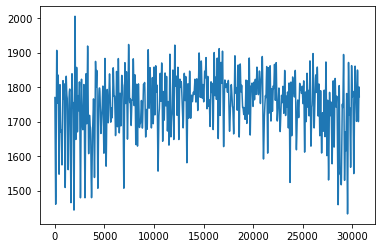

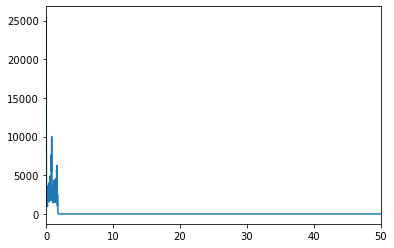

In [10]:
#  repeat numpy array to match length of rawEEG
newEEG = rawEEGM[:,0]
#  add noise
m, s = np.mean(newEEG), np.std(newEEG)
noise = np.random.normal(m, s, newEEG.shape)
newEEG = newEEG + noise
#  resample
newEEG = signal.resample(newEEG,upFs*duration)
#  plot
plt.plot(newEEG)
plt.show()

f,p = psd(newEEG,fs=256,data_1D=True)
plt.plot(f,p)
plt.xlim(0,50)
plt.show()